# Computational Mathematics
## An Introduction to Numerical Analysis and Scientific Computing with Python
### By Dimitrios Mitsotakis

# Chapter 9: Numerical Linear Algebra

## Numerical Solution of Linear Systems

A direct method usually is a method that computes the exact solution (not approximation) when we use infinite precision arrithmetic. Due to finite precision arithmetic though when we use computers the solution will be an approximation.

### Algorithm for the naive Gaussian elimination

The procedure of the *forward elimination* can be described as follows:

- Given the arrays ${\bf A}$ and ${\bf b}$ the solution ${\bf x}$ replaces ${\bf b}$
- For $k=1:n-1$
    - For $i=k+1:n$
        - ${\bf M}(i,k)={\bf A}(i,k)/{\bf A}(k,k)$
        - ${\bf A}(i,k:n)={\bf A}(i,k:n)-{\bf M}(i,k)\cdot {\bf A}(k,k:n)$
        - ${\bf b}(i)={\bf b}(i)-{\bf M}(i,k)\cdot {\bf b}(k)$
    - EndFor
- EndFor

To solve the linear system ${\bf A}{\bf x}={\bf b}$ then we proceed with the algorithm of back-substitution

- Given an upper triangular array ${\bf A}$, the right-hand side ${\bf b}$ is replaced by the solution ${\bf x}$
- ${\bf b}(n)={\bf b}(n)/{\bf A}(n,n)$
- For $k=n-1:1:-1$
    - ${\bf b}(k)=({\bf b}(k)-{\bf A}(k,k+1:n)\cdot {\bf b}(k+1:n))~/~{\bf A}(k,k)$
- EndFor

In [1]:
import numpy as np

In [2]:
def Gauss_elimination(A,b):
    n = len(b)
    # Gaussian elimination
    for k in range(n-1):
        for i in range(k+1,n):
            if A[k,k]!=0.0:
                mik=A[i,k]/A[k,k]
                A[i,k+1:n] = A[i,k+1:n] - mik * A[k,k+1:n]
                b[i] = b[i] - mik * b[k]    
    # backward substitution 
    for k in range(n-1,-1,-1):
        b[k] = (b[k]-np.dot(A[k,k+1:n],b[k+1:n]))/A[k,k]
    return b

In [3]:
A = np.array([[ 1., 1., 0.], 
              [ 2., 1.,-1.], 
              [ 3.,-1.,-1.]])
b = np.array([ 2., 2., 1.])
x = Gauss_elimination( A.copy(), b.copy() )
print(x)

[1. 1. 1.]


## $LU$ Factorization

The Gaussian elimination is expressed as
$${\bf U}={\bf M}_{n-1}{\bf M}_{n-2}\cdots {\bf M}_1 {\bf A}\ ,$$
where ${\bf M}_i$ is lower triangular matrix with ones in its main diagonal for all $i=1,\dots, n-1$. All these matrices ${\bf M}_i$ are invertible since all their diagonal entries of ${\bf M}_i$ are nonzero, and thus $\det({\bf M}_i)=1$. Therefore, the matrix ${\bf A}$ can be written as
$${\bf A}={\bf M}_1^{-1}{\bf M}_2^{-1}\cdots {\bf M}_{n-1}^{-1} {\bf U}={\bf L}{\bf U}\ ,$$

The algorithm for obtaining the matrices ${\bf L}$ and ${\bf U}$ is a modification of the Gaussian elimination algorithm:

- For $k=1:n-1$
    - For $i=k+1:n$
        - If ${\bf A}(k,k)\not=0$
            - $m_{ik}={\bf A}(i,k)/{\bf A}(k,k)$
            - ${\bf A}(i,k:n)={\bf A}(i,k:n)-m_{ik}\cdot {\bf A}(k,k:n)$
            - ${\bf A}(i,k)=m_{ik}$
        - EndIf
    - EndFor
- EndFor


The implementation of this algorithm can be the following:

In [4]:
def LU(A):
    # LU factorization of matrix A
    n = len(A)
    for k in range(n-1):
        for i in range(k+1,n):
            if A[k,k] != 0.0:
                mik = A[i,k]/A[k,k]
                A[i,k+1:n] = A[i,k+1:n] - mik*A[k,k+1:n]
                A[i,k] = mik
    return A

In [5]:
A = np.array([[ 1., 1., 0.], 
              [ 2., 1.,-1.], 
              [ 3.,-1.,-1.]])

B = LU(A)

L = np.tril(B)
U = np.triu(B)

print('L =', L)
print('U =', U)
print(L@U)

L = [[ 1.  0.  0.]
 [ 2. -1.  0.]
 [ 3.  4.  3.]]
U = [[ 1.  1.  0.]
 [ 0. -1. -1.]
 [ 0.  0.  3.]]
[[ 1.  1.  0.]
 [ 2.  3.  1.]
 [ 3. -1.  5.]]


#### Solving Linear Systems with $LU$ Factorization

In order to solve a system ${\bf A}{\bf x}={\bf b}$ given that ${\bf A}={\bf L}{\bf U}$, we set ${\bf U}{\bf x}={\bf y}$. Then, we first solve the system ${\bf L}{\bf y}={\bf b}$ and then the system ${\bf U}{\bf x}={\bf y}$. The solution of the system ${\bf U}{\bf x}={\bf y}$ is solved with backward substitution.

The system ${\bf L}{\bf y}={\bf b}$ can be solved easily using forward substitution. The algorithm of the forward substitution is the following (and is the reverse of the backward substitution):

- Given the lower triangular array ${\bf L}$, the right-hand side ${\bf b}$ of the system ${\bf L}{\bf y}={\bf b}$ the solution ${\bf y}$ replaces ${\bf b}$
- ${\bf b}(1)={\bf b}(1)/{\bf L}(1,1)$
- For $k=2:n$
    - ${\bf b}(k)=({\bf b}(k)-{\bf L}(k,1:k-1)\cdot {\bf b}(1:k-1))~/~{\bf L}(k,k)$
- EndFor


In [6]:
def solveLU(A,b):
    # Solution of the linear system LUx=b
    # matrix A contains the LU factorization of A
    n = len(A)
    # Solve the low triangular system Ly=b, note that L_ii = 1.0
    for k in range(1,n):
        b[k] = b[k] - np.dot(A[k,0:k],b[0:k])
    # Solve the upper triangular system Ux=b
    b[n-1] = b[n-1]/A[n-1,n-1]    
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(A[k,k+1:n],b[k+1:n]))/A[k,k]
    return b

In the next piece of code we use the above functions to decompose a matrix $A$ and then solve two systems with different right-hand sides:

In [7]:
A = np.array([[ 1., 1., 0.], 
              [ 2., 1.,-1.], 
              [ 3.,-1.,-1.]])
b1 = np.array([ 2., 2., 1.])
b2 = np.array([ 4., 4., 2.])
# Perform LU factorization once
A = LU(A)
# Solve the first system using forward/backward substitution
x1 = solveLU(A,b1)
print(x1)
#Solve the second system using forward/backward substitution
x2 = solveLU(A,b2)
print(x2)

[1. 1. 1.]
[2. 2. 2.]


## Pivoting Strategies

There are some linear systems where Gaussian elimination can fail in practice due to the the finite precision arithmetic of the computers.

For example consider a linear system with one of the matrices
$${\bf A}_1=\begin{pmatrix}
0 & 1 \\
1 & 1\\
\end{pmatrix}\quad \text{or} \quad  {\bf A}_2=\begin{pmatrix}
10^{-17} & 1 \\
1 & 1\\
\end{pmatrix}\ .
$$

In the first case the first multiplier is 0 and thus we cannot perform Gaussian elimination. In the second case, with right-hand side $(1,2)$, although the exact solution is close to $(1,1)$ we compute $(0,1)$ which is totally wrong:

In [8]:
A = np.array([[ 1.e-17, 1.], 
              [ 1., 1.]])
b = np.array([ 1., 2.])
x = Gauss_elimination(A,b)
print(x)

[0. 1.]


The solution is to change the order of the rows:

In [9]:
A = np.array([[ 1., 1.], 
              [ 1.e-17, 1.]])
b = np.array([ 2., 1.])
x = Gauss_elimination(A,b)
print(x)

[1. 1.]


### Gaussian elimination with partial pivoting

he simplest strategy is to select the element in the same column that is below the diagonal and has the largest absolute value: At stage $k$  of the outer loop of the factorization

- we determine the smallest $p\geq k$ such that 

$$|a_{pk}|=\max_{k\leq i \leq n} |a_{ik}|$$

- perform $(E_k) \leftrightarrow (E_p)$

In this case no interchange of columns is used, but interchange of rows. There is a column pivoting strategy where we proceed as in the row pivoting but interchange columns. Column pivoting requires reordering of the unknowns, and does not work well with direct factorization. 

The row swap can be performed very easy with the following function:

In [10]:
def rowSwap(v,i,j):
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]

Then the Gaussian elimination takes the following form:

In [11]:
def pGauss_elimination(A,b,tol=1.0e-15):
    n = len(b)
    for k in range(n-1):
        # swap rows if necessary
        p = np.argmax(np.abs(A[k:n,k])) + k
        if np.abs(A[p,k]) < tol: 
            error.err('singular matrix has been detected')
        if p != k:
            rowSwap(b,k,p)
            rowSwap(A,k,p)
        # perform Gauss elimination  
        for i in range(k+1,n):
            if A[k,k] != 0.0:
                mik = A[i,k]/A[k,k]
                A[i,k+1:n] = A[i,k+1:n] - mik*A[k,k+1:n]
                b[i] = b[i] - mik*b[k]
    # check if the matrix is singular            
    if np.abs(A[n-1,n-1]) < tol:
        error.err('singular matrix has been detected')        
    # perform backward substitution
    b[n-1] = b[n-1]/A[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] -np.dot(A[k,k+1:n],b[k+1:n]))/A[k,k]
    return b

And now even the first case with the 0 pivot works well:

In [12]:
A = np.array([[ 0., 1.], 
              [ 1., 1.]])
b = np.array([ 1., 2.])
x = pGauss_elimination(A,b)
print(x)

[1. 1.]


### $LU$ decomposition with pivoting

First, we define the permutation matrix. A permutation matrix is an identity matrix with its rows or columns interchanged.

For example, if we want to interchange rows 1 and 3, then the permutation matrix is:

$$
P=
\begin{pmatrix}
0 & 0 & 1\\
0 & 1 & 0\\
1 & 0 &0
\end{pmatrix}
$$

Then, for any $n\times n$ matrix $A$ of rank $n$, there is a reordering of rows such that
$$PA=LU$$ 
where $P$ is a permutation matrix that reorder the rows of $A$.

We can modify similarly to the Gaussian elimination and obtain the following algorithm of the $LU$ factorization with partial pivoting

- Given the array ${\bf A}$
- For $k=1:n-1$
    - Find $p$ such that $|{\bf A}(p,k)|=\max_{k\leq p\leq n} |{\bf A}(k:n,k)|$
    - Swap rows ${\bf A}(k,:)\leftrightarrow {\bf A}(p,:)$
    - Swap rows $perm(k)\leftrightarrow perm(p)$
    - For $i=k+1:n$
        - If ${\bf A}(i,k)\not=0$
            - $m_{ik}={\bf A}(i,k)/{\bf A}(k,k)$
            - ${\bf A}(i,k+1:n)={\bf A}(i,k+1,n)-m_{ik}\cdot {\bf A}(k,k+1:n)$
            - ${\bf A}(i,k)=m_{ik}$
        - EndIf
    - EndFor
- EndFor

This algorithm can be implemented in the following function:

In [13]:
def LUpivot(A,tol=1.0e-15):
    n = len(A)
    # define permutation vector
    perm = np.array(range(n))
    for k in range(0,n-1):
        # perform row interchange if necessary
        p = np.argmax(np.abs(A[k:n,k])) + k
        if np.abs(A[p,k]) < tol:
            error.err('singular matrix has been detected')
        if p != k:
            rowSwap(A,k,p)
            rowSwap(perm,k,p)
        # perform Gauss elimination
        for i in range(k+1,n):
            if A[i,k] != 0.0:
                mik = A[i,k]/A[k,k]
                A[i,k+1:n] = A[i,k+1:n] - mik*A[k,k+1:n]
                A[i,k] = mik
    return A, perm 

In order to solve a linear system ${\bf A}{\bf x}={\bf b}$ using $LU$ factorization with partial pivoting, we multiply both sides of the system with ${\bf P}$ to obtain ${\bf L}{\bf U}{\bf x}={\bf P}{\bf b}$ since ${\bf P}{\bf A}={\bf L}{\bf U}$. Then, we perform the usual steps of forward and backward substitution to the vector ${\bf P}{\bf b}$ instead of ${\bf b}$. The implementation could be the following

In [14]:
def solveLUpivot(A,b,perm):
    n = len(A)
    # Store right-hand side in solution vector x
    x = b.copy()
    for i in range(n):
        x[i]=b[perm[i]]
    # Forward-backward substitution
    for k in range(1,n):
        x[k] = x[k] - np.dot(A[k,0:k],x[0:k])
    x[n-1] = x[n-1]/A[n-1,n-1]
    for k in range(n-2,-1,-1):
        x[k] = (x[k] - np.dot(A[k,k+1:n],x[k+1:n]))/A[k,k]
    return x

We test our code for the system ${\bf A}{\bf x}={\bf b}$ with 
$${\bf A}=\begin{pmatrix}
3 & 17 & 10 \\
2 & 4 & -2 \\
6 & 18 & -12 
\end{pmatrix}
\quad \mbox{and}\quad
{\bf b}=\begin{pmatrix}
30\\ 4\\ 12\\
\end{pmatrix}\ ,
$$



In [15]:
A = np.array([[ 3., 17., 10.], 
              [ 2., 4.,-2.], 
              [ 6.,18.,-12.]])
b = np.array([ 30., 4., 12.])
[A,perm] = LUpivot(A)
x = solveLUpivot(A,b,perm)
print(x)

[1. 1. 1.]


In [16]:
# construct lower triangular matrix L
L = np.tril(A,-1)+np.eye(3)
# construct upper triangular matrix U
U = np.triu(A)
# construct permutation matrix P
P = np.eye(3)
P = P[perm,:]
print('P='); print(P)
print('L='); print(L)
print('U='); print(U)

P=
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
L=
[[ 1.          0.          0.        ]
 [ 0.5         1.          0.        ]
 [ 0.33333333 -0.25        1.        ]]
U=
[[  6.  18. -12.]
 [  0.   8.  16.]
 [  0.   0.   6.]]


## Cholesky Factorization

If ${\bf A}$ is symmetric and positive definite, then we can write ${\bf A}$ in the form\index{factorization!$HH^T$}\index{factorization!$HH^T$}
$${\bf A}={\bf H}{\bf H}^T\ ,$$
where ${\bf H}$ is lower triangular matrix (without necessarily ones in the main diagonal). This is the Cholesky factorization of symmetric and positive definite matrix. 

The algorithm of Cholesky factorization is the following:

- For $i=1:n$
    - ${\bf H}(i,i)=\sqrt{{\bf A}(i,i)-\sum_{k=1}^{i-1}{\bf H}^2(i,k)}$
    - For $j=i+1:n$
        - ${\bf H}(j,i)=\left({\bf A}(j,i)-\sum_{k=1}^{i-1}{\bf H}(j,k){\bf H}(i,k) \right)/{\bf H}(i,i)$
    - EndFor
- EndFor

and its implementation:

In [17]:
def Cholesky(A):
    n = len(A)
    for i in range(n):
        try:
            A[i,i]=np.sqrt(A[i,i] - np.dot(A[i,0:i],A[i,0:i]))
        except ValueError:
            error.err('Matrix is not positive definite')
        for j in range(i+1,n):
            A[j,i] = (A[j,i]-np.dot(A[j,0:i],A[i,0:i]))/A[i,i]   
    for k in range(1,n):
        A[0:k,k]=0.0 
    return A

####  Solving linear systems using Cholesky factorization

After having a symmetric and positive definite matrix ${\bf A}$ factorized in ${\bf H}{\bf H}^T$, we can employ forward and backward substitution to solve any linear system of the form ${\bf A}{\bf x}={\bf b}$. We first solve the system ${\bf H}{\bf y}={\bf b}$ and then the system ${\bf H}^T{\bf x}={\bf b}$. This is exactly what we did in the $LU$ factorization, with the only difference that instead of ${\bf U}$ we will have here ${\bf H}^T$, and in the forward substitution we need to divide by the diagonal entries $h_{ii}$. 


In [18]:
def solveCholesky(H,b):
    n = len(b)
    # Solve Hy=b
    for k in range(n):
        b[k] = (b[k] - np.dot(H[k,0:k],b[0:k]))/H[k,k]
    # Solve H^T x =y
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(H[k+1:n,k],b[k+1:n]))/H[k,k]
    return b

We try our code with the matrix 
$${\bf A}=\begin{pmatrix} 4 & -1 & 1 \\
-1 & 4.25 & 2.75 \\
1& 2.75 & 3.5 
\end{pmatrix}\ , $$ 
and to the linear system ${\bf A}{\bf x}={\bf b}$ with ${\bf b}=(4, 6, 7.25)^T$ we get the right answer, as expected.

In [19]:
A = np.array([[4.0, -1.0, 1.0], 
              [-1.0, 4.25, 2.75], 
              [1.0, 2.75, 3.5]])
H = Cholesky(A)
print(H)
b = np.array([4.0, 6.0, 7.25])
x = solveCholesky(H,b)
print(x)

[[ 2.   0.   0. ]
 [-0.5  2.   0. ]
 [ 0.5  1.5  1. ]]
[1. 1. 1.]


## The Module `scipy.linalg` Again

The easiest way to obtain the $LU$ factorization of a matrix  ${\bf A}$ is by using its SciPy implementation, which is the function `scipy.linalg.lu`. 

In [20]:
import scipy.linalg as spl
A = np.array([[ 3., 17., 10.], 
              [ 2., 4.,-2.], 
              [ 6.,18.,-12.]])
(P,L,U) = spl.lu(A)
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.          0.          0.        ]
 [ 0.5         1.          0.        ]
 [ 0.33333333 -0.25        1.        ]]
[[  6.  18. -12.]
 [  0.   8.  16.]
 [  0.   0.   6.]]


A similar function of the module `scipy.linalg` is the function `lu_factor`. The function `lu_solve` returns only the solution `x`. For example, in the previous problem we write:

In [21]:
A = np.array([[ 3., 17., 10.], 
              [ 2., 4.,-2.], 
              [ 6.,18.,-12.]])
b = np.array([30., 4., 12.])
(LU,P) = spl.lu_factor(A)
x = spl.lu_solve((LU,P),b)
print(x)

[1. 1. 1.]


There are two implementations of the Cholesky factorization in Python. One is in module `numpy.linalg` and the other in `scipy.linalg`. Both functions have the same name, which is `cholesky` and require as input a symmetric and positive definite matrix.

In order to solve the triangular systems ${\bf H}{\bf y}={\bf b}$ and ${\bf H}^T{\bf x}={\bf y}$ we can use the function `solve_triangular` of `scipy.linalg`

In [22]:
A = np.array([[4.0, -1.0, 1.0], 
              [-1.0, 4.25, 2.75], 
              [1.0, 2.75, 3.5]])
b = np.array([4.0, 6.0, 7.25])
H = spl.cholesky(A)
print(H)
# We use the option lower=True since H is lower triangular matrix
y = spl.solve_triangular(H, b, lower=True)
# We use the option trans=1 to solve the system H^Tx=y
x = spl.solve_triangular(H, y, trans=1, lower=True)
print(x)

[[ 2.  -0.5  0.5]
 [ 0.   2.   1.5]
 [ 0.   0.   1. ]]
[1.   1.5  7.25]


## Iterative Methods

Here we present some of the classical iterative methods:

### The Jacobi Method

The Jacobi method is the simplest iterative method. We choose for the splitting of ${\bf A}={\bf M}-{\bf N}$ the matrices
$${\bf M}={\bf D}\quad \mbox{ and } \quad {\bf N}={\bf L}+{\bf U}\ .$$
Then, the fixed point method ${\bf M}{\bf x}^{(k+1)}={\bf N}{\bf x}^{(k)}+{\bf b}$ is written as 
$${\bf D}{\bf x}^{(k+1)}=({\bf L}+{\bf U}){\bf x}^{(k)}+{\bf b}\ .$$
The choice of the matrix ${\bf M}={\bf D}$ is not by chance of course. Since our method relies on the inversion of ${\bf M}$, we prefer ${\bf M}$ to be easily invertible, and there is no matrix more easily invertible than a diagonal matrix. After inverting the diagonal matrix ${\bf D}$, we have the Jacobi method written in vector form
$$
{\bf x}^{(k+1)}={\bf D}^{-1}({\bf L}+{\bf U}){\bf x}^{(k)}+{\bf D}^{-1}{\bf b},\quad k=0,1,2,\dots\ .
$$
Writing each equation of the Jacobi iteration explicitly, we have for each entry of ${\bf x}^{(k+1)}$ that
$$
x_i^{(k+1)}=\left(b_i-\sum_{\substack{j=1\\ j\not=i}}^na_{ij}x_j^{(k)} \right)\Big/a_{ii},\quad i=1,\dots, n\ .
$$
We immediately deduce that we need $a_{ii}\not=0$, for $i=1,2,\dots, n$. If ${\bf A}$ is nonsingular but one of the values $a_{ii}$ is $0$ then  reordering of the equations can be performed so that no $a_{ii}$ is zero. 

Our implementation using matrix format is the following:


In [23]:
import numpy.linalg as npl


def jacobi(A, b, x, tol = 1.e-5, maxit = 100):
    d = np.copy(np.diag(A))
    np.fill_diagonal(A,0.0)
    err = 1.0
    iters = 0
    while (err > tol and iters < maxit):
        iters += 1
        xnew = (b - np.dot(A,x)) / d
        err = npl.norm(xnew-x,np.inf)
        x = np.copy(xnew)
    print('iterations required for convergence:', iters)
    return x

We test the code for a system ${\bf A}{\bf x}={\bf b}$ with matrix
$${\bf A}=\begin{pmatrix}
2 & -1 & 0\\
-1 &3 & -1\\
0 &-1& 2
\end{pmatrix}\ ,$$
and vector ${\bf b}=(1, 8, -5)^T$, which has exact solution ${\bf x}=(2,3,-1)^T$. As initial guess we take the vector ${\bf x}^{(0)}=(0,0,0)^T$.


In [24]:
A = np.array([[2.0, -1.0,  0.0],
              [-1.0, 3.0, -1.0],
              [0.0, -1.0,  2.0]])
b = np.array([1.0, 8.0, -5.0])
x = np.zeros(3)
x = jacobi(A, b, x, 1.e-5, 100)
print(x)

iterations required for convergence: 24
[ 1.99999906  2.99999435 -1.00000094]


### The Gauss-Seidel Method

The Gauss-Seidel method uses the same splitting for the matrix ${\bf A}={\bf M}-{\bf N}={\bf D}-{\bf L}-{\bf U}$ as the Jacobi method, but instead of choosing ${\bf M}$ to be diagonal we choose ${\bf M}$ to be the lower triangular matrix ${\bf M}={\bf D}-{\bf L}$. Therefore, ${\bf N}$ is the upper triangular matrix ${\bf N}={\bf U}$. The fixed point equation then becomes
$$({\bf D}-{\bf L}){\bf x}={\bf U}{\bf x}+{\bf b}\ ,$$
and the Gauss-Seidel iteration is defined as
$$
({\bf D}-{\bf L}){\bf x}^{(k+1)}={\bf U}{\bf x}^{(k)}+{\bf b},\quad k=0,1,2,\dots\ .
$$
In order to solve for the next iteration ${\bf x}^{(k+1)}$ given the approximation ${\bf x}^{(k)}$
we either need to invert a lower triangular matrix or perform the forward substitution. After the inversion of the matrix ${\bf D}-{\bf L}$, the $k+1$ iteration can be written in the form
$$
{\bf x}^{(k+1)}=({\bf D}-{\bf L})^{-1}{\bf U}{\bf x}^{(k)}+({\bf D}-{\bf L})^{-1}{\bf b}\ .
$$
Performing forward substitution we obtain
$$
x_i^{(k+1)}=\left(b_i-\sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} -\sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)\Big/a_{ii}.\quad i=1,\dots, n\ .
$$

Our implementation again is the following:


In [25]:
def gauss_seidel(A, b, x, tol = 1.e-5, maxit = 100):
    n = len(b)
    err = 1.0
    iters = 0
    # Initialize the solution with the initial guess
    xnew = np.zeros_like(x)
    # Extract the lower triangular part of A
    M = np.tril(A)
    # Construct the upper triangular part of A
    U = A - M
    while (err > tol and iters < maxit):
        iters += 1
        # Compute the new approximation
        xnew = np.dot(npl.inv(M), b - np.dot(U, x))
        # Estimate convergence
        err = npl.norm(xnew-x,np.inf)
        x = np.copy(xnew)
    print('iterations required for convergence:', iters)     
    return x

Testing the code for the same system as we did in the case of the Jacobi method we compute the same solution.

In [26]:
A = np.array([[2.0, -1.0,  0.0],
              [-1.0, 3.0, -1.0],
              [0.0, -1.0,  2.0]])
b = np.array([1.0, 8.0, -5.0])
x = np.zeros(3)
x = gauss_seidel(A, b, x, 1.e-5, 100)
print(x)

iterations required for convergence: 11
[ 1.99999577  2.99999718 -1.00000141]


A different implmentation is the following:

In [27]:
def gauss_seidel(A, b, x, tol = 1.e-5, maxit = 100):
    n = len(b)
    err = 1.0
    iters = 0
    xnew = np.zeros_like(x)
    while (err > tol and iters < maxit):
        iters += 1
        for i in range(n):
            s1 = np.dot(A[i, :i], xnew[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            xnew[i] = (b[i] - s1 - s2) / A[i, i]
        err = npl.norm(xnew-x,np.inf)
        x = np.copy(xnew)
    print('iterations required for convergence', iters)
    return x

In [28]:
A = np.array([[2.0, -1.0,  0.0],
              [-1.0, 3.0, -1.0],
              [0.0, -1.0,  2.0]])
b = np.array([1.0, 8.0, -5.0])
x = np.zeros(3)
x = gauss_seidel(A, b, x, 1.e-5, 100)
print(x)

iterations required for convergence 11
[ 1.99999577  2.99999718 -1.00000141]


## Sparse Matrices

Often in applications the resulting matrices are sparses, i.e. most of their entries are zeros. An example of a sparse matrix is the tridiagonal matrix for example

$${\bf A}=\begin{pmatrix}
2 & -1 & 0 & \cdots & 0\\
-1 & 2 & -1 & \cdots & 0\\
0 & \ddots & \ddots & \ddots & 0\\
0 & \cdots & -1 & 2 & -1\\
0 & \cdots & 0 & -1 & 2
\end{pmatrix}
$$

To store these matrices efficiently we usually prefer to store only the nonzero entries using special data structures.

SciPy provides tools to handle sparse matrices with the module `sparse`.

There are seven different types of sparse matrix storage available, namely, the

- bsr_matrix: Block Sparse Row matrix

- coo_matrix: Coordinate format matrix

- csc_matrix: Compressed sparse column matrix

- csr_matrix: Compressed sparse row matrx

- dia_matrix: Sparse matrix with diagonal storage

- dok_matrix: Dictionary of keys based sparse matrix

- lil_matrix: Row-based linked list sparse matrix

We will not analyse all these formats in this course but we suggest the interested reader to search online for more information.

Here is an example of sparse storage using the `coo_matrix` where the nonzero entries are stored in an array and in two different arrays the corresponding $i$, $j$ indices:

In [29]:
from scipy import sparse

S = np.array([[ 2.0,-1.0, 0.0, 0.0],
           [-1.0, 2.0,-1.0, 0.0],
           [ 0.0,-1.0, 2.0,-1.0],
           [ 0.0, 0.0,-1.0, 2.0]])

A = sparse.coo_matrix(S)

print(A)

  (0, 0)	2.0
  (0, 1)	-1.0
  (1, 0)	-1.0
  (1, 1)	2.0
  (1, 2)	-1.0
  (2, 1)	-1.0
  (2, 2)	2.0
  (2, 3)	-1.0
  (3, 2)	-1.0
  (3, 3)	2.0


In Python we can get the CSR format easily using the `sparse.csr_matrix` function as it is demonstrated in the following example.


In [30]:
import numpy as np

A = np.array([[10, 20,  0,  0,  0,  0],
              [ 0, 30,  0, 40,  0,  0],
              [ 0,  0, 50, 60, 70,  0],
              [ 0,  0,  0,  0,  0, 80]])
S = sparse.csr_matrix(A)
print(S.data[:])
print(S.indptr[:])
print(S.indices[:])

[10 20 30 40 50 60 70 80]
[0 2 4 7 8]
[0 1 1 3 2 3 4 5]


### Sparse Gauss-Seidel Implementation

We present a naive implementation of the method for sparse matrices, where we just store the matrix $\bA$ into the CSR sparse format in Python. We consider the matrix ${\bf A}=tridiag(-1,2,-1)$, which can be written analytically
$$
{\bf A}=\begin{pmatrix}
2 & -1 & 0 & 0\\
-1 & 2 & -1 & 0\\
0 & -1& 2 & -1 \\
0 & 0 & -1 & 2
\end{pmatrix}\ ,
$$
and the vector ${\bf b}=(1,0,0,1)$. Then, the system ${\bf A}{\bf x}={\bf b}$ has the unique solution ${\bf x}=(1,1,1,1)$. We get the CSR format of ${\bf A}$ as before.

In [31]:
A = np.array([[ 2.0,-1.0, 0.0, 0.0],
              [-1.0, 2.0,-1.0, 0.0],
              [ 0.0,-1.0, 2.0,-1.0],
              [ 0.0, 0.0,-1.0, 2.0]])
S = sparse.csr_matrix(A)
x = np.ones(4)
b = S.dot(x)

In this code we create the right-hand side using the command `b = S.dot(x)` which performs sparse matrix vector multiplication. This multiplication takes into account the sparsity of ${\bf A}$ and is faster than the full matrix multiplication.

In the following code we present an implementation of the Gauss-Seidel method for sparse matrices.

In [32]:
def sp_gauss_seidel(S, b, x, tol = 1.e-5, maxit = 100):
    n = len(b)
    xnew = np.zeros_like(x) # create new vector
    D = sparse.spdiags(S, 0, n, n)
    L = sparse.tril(S, 0, format = 'csc')
    U = sparse.triu(S, 1, format = 'csc')
    G = -(sparse.linalg.inv(L)).dot(U)
    c = (sparse.linalg.inv(L)).dot(b)
    iters = 0
    err = 1.0
    while (err > tol and iters < maxit):
        iters += 1
        xnew = G*x + c
        err = npl.norm(xnew-x, np.inf)
        x = xnew
    print('iterations required for convergence:', iters)
    return x

And we test our code:

In [33]:
x = np.zeros(len(b))
x = sp_gauss_seidel(S, b, x, tol = 1.e-5, maxit = 100)
print(x)

iterations required for convergence: 27
[0.99998763 0.9999838  0.9999869  0.99999345]


#### Avoiding Inverse Matrix

A sophisticated implementation of Gauss-Seidel method should avoid the computation of the inverse of ${\bf D}-{\bf L}$, and make use of the indices of the non-zero entries only. In order to implement the Gauss-Seidel method efficiently, we consider writing the method in vector format:
Let ${\bf A}_i$ be the $i$-th row of ${\bf A}$. The two sums in the formula
$$x_i^{(k+1)}=\left(b_i-\sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} -\sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)/a_{ii}\ ,$$ 
can be represented as the regular vector product of ${\bf A}_i$ with the vector 
$${\bf z}^{(k)} =(x_1^{(k+1)},\dots,x_{i-1}^{(k+1)},0,x_{i+1}^{(k)},\dots,x_n^{(k)})^T\ .$$
Subsequently, the Gauss-Seidel iteration takes the form
$$x_i^{(k+1)}=\left(b_i-{\bf A}_i{\bf z}^{(k)}\right)/a_{ii}\ .$$ 
The implementation of this technique can be the following:

In [34]:
def sp_gauss_seidel(S, b, x, tol = 1.e-5, maxit = 100):
    n = len(b)
    err = 1.0
    iters = 0
    D = S.diagonal()
    xnew = np.zeros_like(x)
    while (err > tol and iters < maxit):
        iters += 1
        for i in range(n):
            rowstart = S.indptr[i]
            rowend = S.indptr[i+1]
            z = np.copy(x)
            z[:i] = xnew[:i]
            z[i]=0.0
            s = np.dot(S.data[rowstart:rowend], z[S.indices[rowstart:rowend]])
            xnew[i] = (b[i] - s) / D[i]
        err = np.linalg.norm(xnew-x,np.inf)
        x = np.copy(xnew)
    print('iterations required for convergence:', iters)
    return x

Testing the code using the same matrices as before we get

In [35]:
A = np.array([[ 2.0,-1.0, 0.0, 0.0],
              [-1.0, 2.0,-1.0, 0.0],
              [ 0.0,-1.0, 2.0,-1.0],
              [ 0.0, 0.0,-1.0, 2.0]])
S = sparse.coo_matrix(A)
x = np.ones(4)
S = S.tocsr()
b = S.dot(x)
x = np.zeros(len(b))
x = sp_gauss_seidel(S, b, x, tol = 1.e-5, maxit = 100)
print(x)

iterations required for convergence: 27
[0.99998763 0.9999838  0.9999869  0.99999345]


### Sparse linear systems and the module `scipy.sparse`

We can solve a system of equations ${\bf S}{\bf x}={\bf b}$ given that ${\bf S}$ is in sparse format  using the function `spsolve` of `scipy.sparse.linalg`

In [36]:
from scipy import sparse
from scipy.sparse import linalg
import numpy as np

A = np.array([[ 2.0,-1.0, 0.0, 0.0],
              [-1.0, 2.0,-1.0, 0.0],
              [ 0.0,-1.0, 2.0,-1.0],
              [ 0.0, 0.0,-1.0, 2.0]])
S= sparse.csc_matrix(A)
x = np.ones(4)
b = S.dot(x)
x = linalg.spsolve(S,b)
print(x)


[1. 1. 1. 1.]


We can view the structure of the nonzero entries of a matrix $S$ using the module MatPlotLib as follows

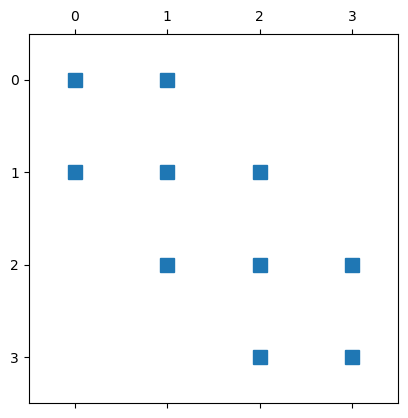

In [37]:
import matplotlib.pyplot as plt

plt.spy(S)
plt.show()

A conventional way to characterize a matrix as sparse is to consider the sparsity index $I_s=N_s/N$ where $N_s$ is the number of zero entries of $S$. The closer this index is to 1 the more sparse is the matrix $S$. In our example

In [39]:
Is = 1-S.count_nonzero()/np.size(S.toarray())
print(Is)

0.375


### Application in electric circuits

Using Kirchhoff's laws to analyze a circuit we obtain the linear system ${\bf A}{\bf x}={\bf b}$

$$
{\bf A}=\begin{pmatrix}
1 & -1 & 0 & 0 & -1 & 0\\
0 & 1 & -1 & -1 & 0 & 0\\
0 & 0 & 0 & 1 & 1 & -1\\
0 & 0 & 0 & 0 & 1 & 2\\
0 & 2 & 0 & 2 & -1 & 0\\
0 & 0 & 1 & -2 & 0 & -2
\end{pmatrix},
\quad {\bf x} =\begin{pmatrix}
I_0\\
I_1\\
I_2\\
I_3\\
I_4\\
I_5
\end{pmatrix} \quad \text{ and }\quad {\bf b}=\begin{pmatrix}
0 \\
0\\
0 \\
10\\
0\\
0
\end{pmatrix}\ .
$$ 
We solve this system as follows:

In [40]:
A = np.array([[ 1.0,-1.0, 0.0, 0.0,-1.0, 0.0],
              [ 0.0, 1.0,-1.0,-1.0, 0.0, 0.0],
              [ 0.0, 0.0, 0.0, 1.0, 1.0,-1.0],
              [ 0.0, 0.0, 0.0, 0.0, 1.0, 2.0],
              [ 0.0, 2.0, 0.0, 2.0,-1.0, 0.0],
              [ 0.0, 0.0, 1.0,-2.0, 0.0,-2.0]])
b = np.array([0, 0, 0, 10, 0, 0])
S = sparse.csc_matrix(A)
I = linalg.spsolve(S,b)
print('I =', I)

I = [ 7.  3.  4. -1.  4.  3.]
